<a href="https://colab.research.google.com/github/gustavolondono/Hi-world/blob/master/clasificador_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image classifier

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Zalando public data

In [4]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test'] #train and test data separation

In [5]:
nombres_clases = metadatos.features['label'].names 

In [6]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#data normalizing
each pixel has its value transformed from a 0-255 range to a 0-1 range

In [7]:
#normalizar los datos (pasar de 0-255 a 0-1)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

  #normalizar los datos de entrenamiento y pruebas con la funcion anterior
  datos_entrenamiento = datos_entrenamiento.map(normalizar)
  datos_pruebas = datos_pruebas.map(normalizar)

  #agregar los datos a cache
  datos_entrenamiento = datos_entrenamiento.cache()
  datos_pruebas = datos_pruebas.cache()


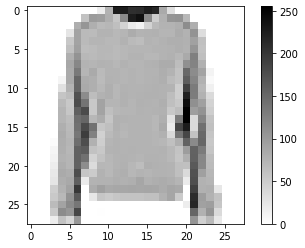

In [8]:
#mostrar la imagen de los datos de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #redimensionar

import matplotlib.pyplot as plt

#dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


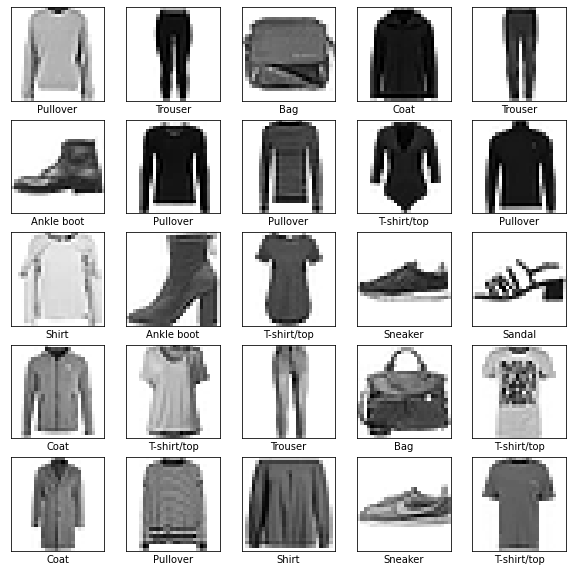

In [9]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [10]:
#crear el modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
#compilar el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [13]:
LOT_SIZE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(LOT_SIZE)
datos_pruebas = datos_pruebas.batch(LOT_SIZE)

In [14]:
import math

#entrenar el modelo
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(60000/LOT_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 2.0838 - accuracy: 0.7052
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6982 - accuracy: 0.7657
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6067 - accuracy: 0.7970
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5875 - accuracy: 0.8066
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5502 - accuracy: 0.8192


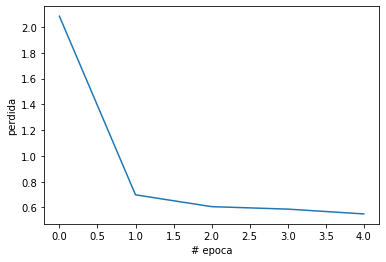

In [15]:
plt.xlabel("# epoca")
plt.ylabel("perdida")
plt.plot(historial.history['loss'])

In [19]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(Falase)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.of}% ({})", format(
      nombres_clases[etiqueta_prediccion],
      100*np.mx(arr_predicciones),
      nombres_clases[etiqueta_real],
      color=color
  ))

  def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color='#777777')
    plt.ylim([0,1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

    filas = 5
    columnas = 5
    num_imagenes = filas * columnas
    plt.figure(figsize=(2*2*columnas, 2*filas))
    for i in range(num_imagenes):
      plt.subplot(fila, 2*columnas, 2*i+1)
      graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
      plt.subplot(filas, 2*columnas, 2*i+2)
      graficar_valor_arreglo(i, predicciones, etiquetas_prueba)
